# Importing Libraries

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import RobustScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
warnings.simplefilter(action='ignore', category=Warning)

# library for prepare the dataset
import os
import zipfile

# library for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# library for data processing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# library for modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, StratifiedKFold

# library for model evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Reading Dataset with pandas

In [2]:
df = pd.read_csv('./data/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Exploring Dataset information 

In [3]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [4]:
# check dataset shape
df.shape

(5110, 12)

In [5]:
# check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
# describe numeric column
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Data Visualization

**Checking Missing Values**

In [7]:
# check missing value of the dataset
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

There is 201 null value in bmi column

<AxesSubplot:>

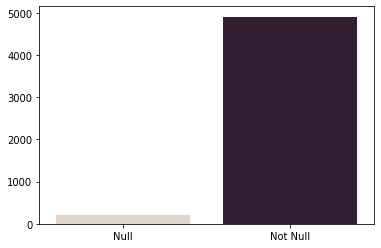

In [8]:
sns.barplot(data=df, x=["Null", "Not Null"], y=[df["bmi"].isnull().sum(), df["bmi"].notnull().sum()], palette="ch:.25")

**Columns with Numerical Values**

In [9]:
# describe numeric column
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<AxesSubplot:>

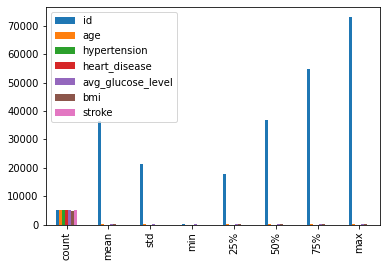

In [10]:
df.describe().plot(kind='bar')

**Checking Dataset Target**

In [11]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

<AxesSubplot:>

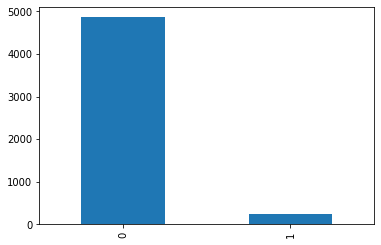

In [12]:
df['stroke'].value_counts().plot(kind='bar')

**Checking Datatype of the Columns**

In [13]:
cats = [col for col in df.columns if df[col].dtypes not in ["int64", "float64"]]
nums = [col for col in df.columns if df[col].dtypes in ["int64", "float64"]]
print(cats)
print(nums)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


**Analyzing Numerical Variables**

In [14]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


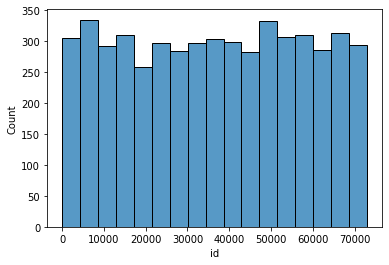

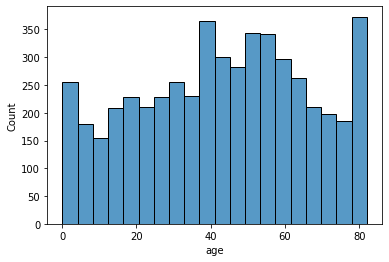

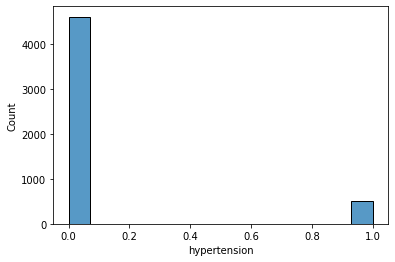

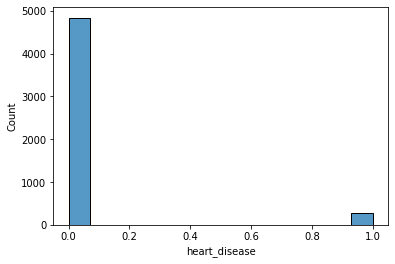

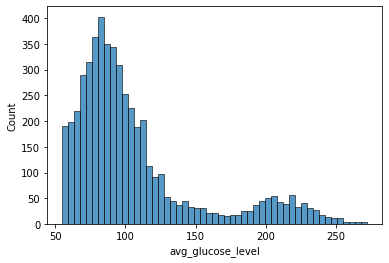

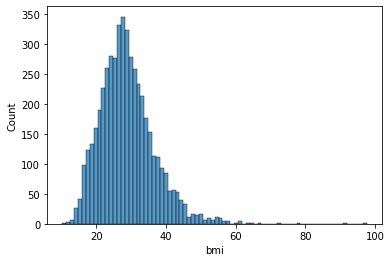

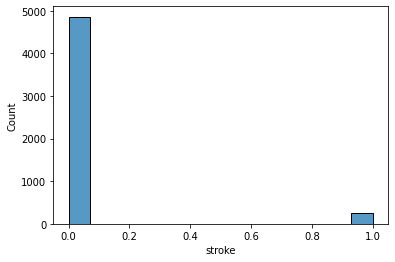

In [15]:
for col in nums:
    sns.histplot(x=df[col], data=df)
    plt.show(block=True)

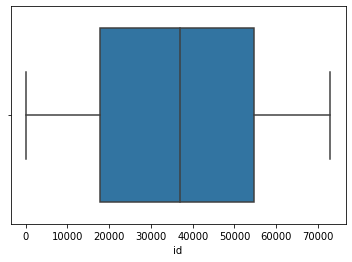

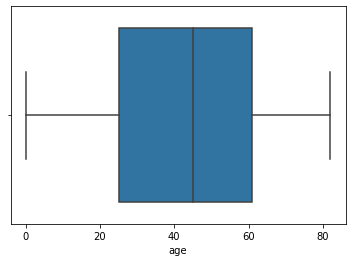

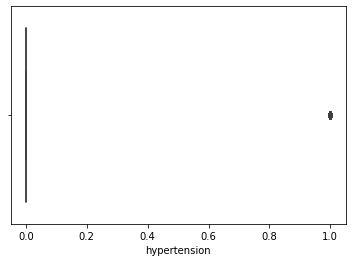

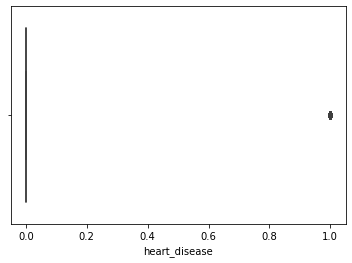

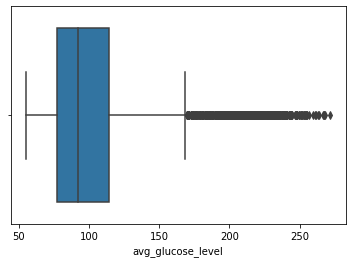

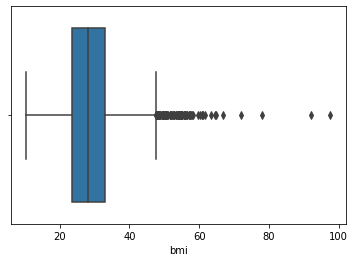

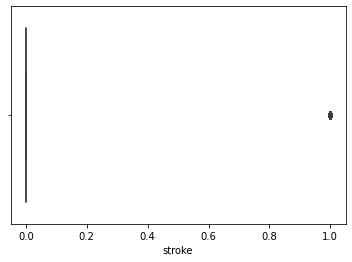

In [16]:
for col in nums:
    sns.boxplot(x=df[col], data=df)
    plt.show(block=True)

**Analyzing Categorical Variables**

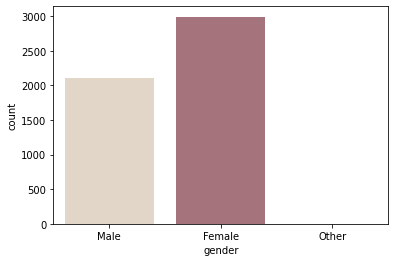

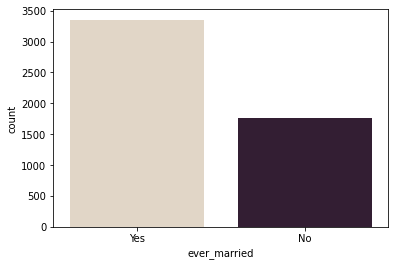

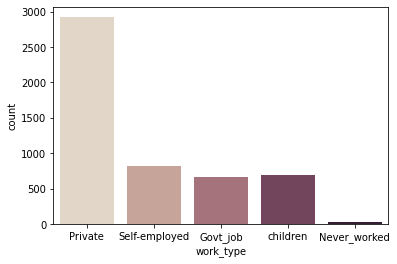

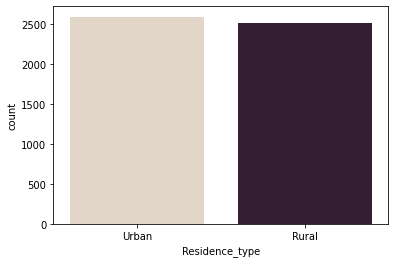

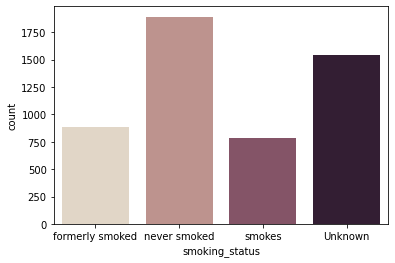

In [17]:
for col in cats: 
    sns.countplot(df[col], palette="ch:.25")
    plt.show(block=True)

**Analyzing Target Variable**

In [18]:
df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

<AxesSubplot:xlabel='stroke', ylabel='count'>

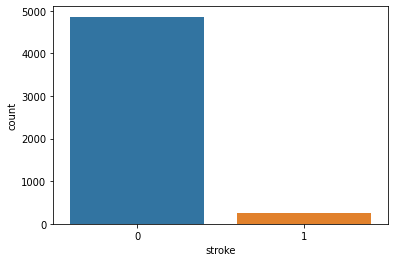

In [19]:
sns.countplot(df["stroke"])

([<matplotlib.patches.Wedge at 0x1c9dbaf9ac8>,
 [Text(-1.0871361453364168, 0.16773491438301516, '0'),
  Text(1.087136143373357, -0.1677349271061446, '1')],
 [Text(-0.5929833520016818, 0.09149177148164463, '95.1%'),
  Text(0.592983350930922, -0.0914917784215334, '4.9%')])

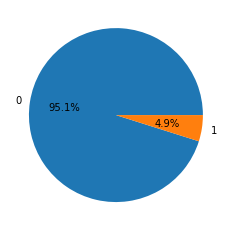

In [20]:
plt.pie(df["stroke"].value_counts(), labels=[0,1], autopct="%1.1f%%")

**Checking for Outliers in Numerical Variables**

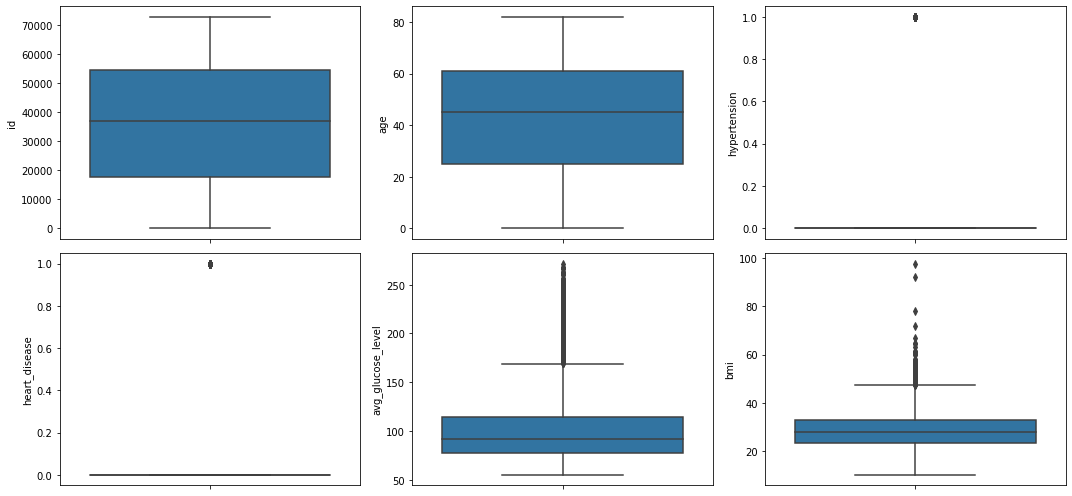

In [21]:
plt.figure(figsize=(15, 7))
for i in range(0, len(nums)-1):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[nums[i]])
    plt.tight_layout()

So, 'avg_glucose_level' and 'bmi' columns are outliers among numerical columns

**Correalation**

<AxesSubplot:>

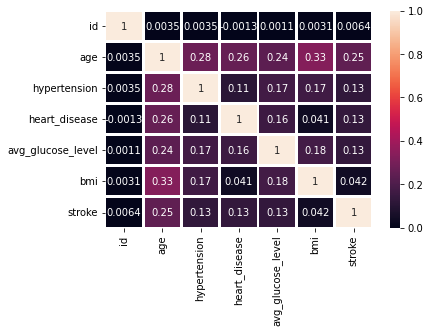

In [22]:
sns.heatmap(df[nums].corr(), annot=True, linewidths=2)

There are no highly correlated columns other than target

**Checking Duplicated Data**

In [23]:
duplicate = df.duplicated()
df[duplicate].sum()

id                   0.0
gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

**Checking Relationships Between Target and Numerical Features**

In [24]:
for col in nums:
    print(df.groupby("stroke").agg({col:"mean"}))

                  id
stroke              
0       36487.236371
1       37115.068273
              age
stroke           
0       41.971545
1       67.728193
        hypertension
stroke              
0           0.088871
1           0.265060
        heart_disease
stroke               
0            0.047110
1            0.188755
        avg_glucose_level
stroke                   
0              104.795513
1              132.544739
              bmi
stroke           
0       28.823064
1       30.471292
        stroke
stroke        
0            0
1            1


According to the results, the probability of having a stroke increases with age, hypertension, heart disease, glucose level and bmi

**Checking Relationships Between Target and Categorical Features**

In [25]:
for col in cats:
    print(pd.DataFrame({"target_mean": df.groupby(col)["stroke"].mean()}), end="\n\n")

        target_mean
gender             
Female     0.047094
Male       0.051064
Other      0.000000

              target_mean
ever_married             
No               0.016505
Yes              0.065613

               target_mean
work_type                 
Govt_job          0.050228
Never_worked      0.000000
Private           0.050940
Self-employed     0.079365
children          0.002911

                target_mean
Residence_type             
Rural              0.045346
Urban              0.052003

                 target_mean
smoking_status              
Unknown             0.030440
formerly smoked     0.079096
never smoked        0.047569
smokes              0.053232



According to the results, the probability of having a stroke is higher in the people who are men, married, self-employed, leading urban life, formerly smoked people.

# Data Preprocessing

**Handling Missing Values with Mean Subtitution**

In [26]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [27]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

In [28]:
# recheck missing value
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**Handling Duplicate Data**

In [29]:
duplicate = df.duplicated()
df[duplicate].sum()

id                   0.0
gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

No Duplicate Data

**Removing Unnecessary Column**

In [30]:
#check unnecessary data
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [31]:
#removing id column
df = df.drop(['id'], axis=1)
nums.remove('id')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


**Converting Categorical data to Numerical**

In [32]:
df[cats].describe().T

,count,unique,top,freq
gender,5110,3,Female,2994
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892


Label encoder is applied to binary columns

In [33]:
binary_cols = [col for col in df.columns if df[col].dtype not in ["int64", "float64"] and df[col].nunique() == 2]
binary_cols

['ever_married', 'Residence_type']

In [34]:
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

In [35]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1
4,Female,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1


One-hot encoder is applied to columns with more than two categories

In [36]:
ohe_cols = [col for col in df.columns if 2 < df[col].nunique() < 10]
ohe_cols

['gender', 'work_type', 'smoking_status']

In [37]:
df = pd.get_dummies(df, columns=ohe_cols, drop_first=True)

In [38]:
df.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,1,1,228.69,36.600000,1,1,0,0,1,0,0,1,0,0
1,61.0,0,0,1,0,202.21,28.893237,1,0,0,0,0,1,0,0,1,0
2,80.0,0,1,1,0,105.92,32.500000,1,1,0,0,1,0,0,0,1,0
3,49.0,0,0,1,1,171.23,34.400000,1,0,0,0,1,0,0,0,0,1
4,79.0,1,0,1,0,174.12,24.000000,1,0,0,0,0,1,0,0,1,0


**Removing Outliers of the Dataset**

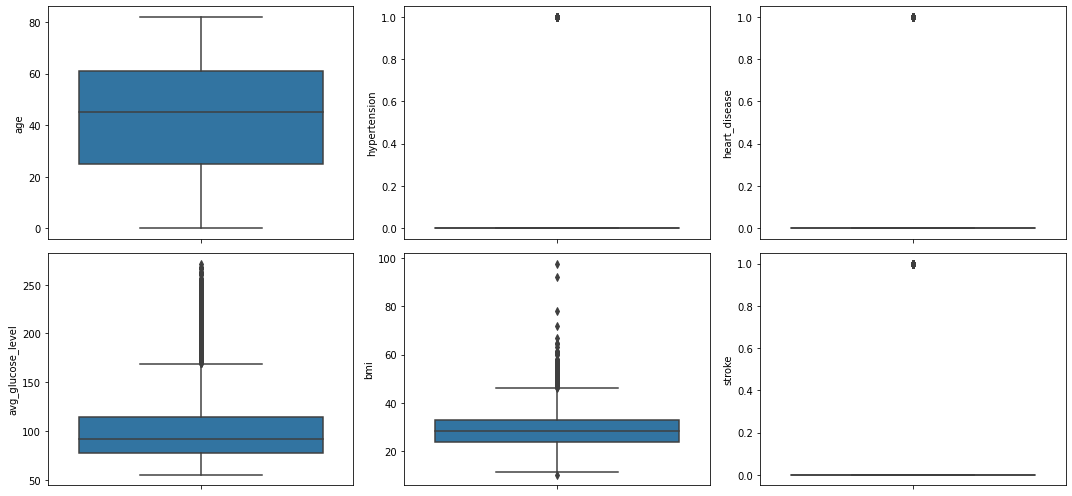

In [39]:
plt.figure(figsize=(15, 7))
for i in range(0, len(nums)):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[nums[i]])
    plt.tight_layout()

In [40]:
outlier = ['avg_glucose_level', 'bmi']

In [41]:
Q1 = df[outlier].quantile(0.25)
Q3 = df[outlier].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[outlier]<(Q1-1.5*IQR))|(df[outlier]>(Q3+1.5*IQR))).any(axis=1)]
df.reset_index(drop=True)

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,80.0,0,1,1,0,105.92,32.500000,1,1,0,0,1,0,0,0,1,0
1,74.0,1,1,1,0,70.09,27.400000,1,1,0,0,1,0,0,0,1,0
2,69.0,0,0,0,1,94.39,22.800000,1,0,0,0,1,0,0,0,1,0
3,59.0,0,0,1,0,76.15,28.893237,1,0,0,0,1,0,0,0,0,0
4,78.0,0,0,1,1,58.57,24.200000,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4386,80.0,1,0,1,1,83.75,28.893237,0,0,0,0,1,0,0,0,1,0
4387,81.0,0,0,1,1,125.20,40.000000,0,0,0,0,0,1,0,0,1,0
4388,35.0,0,0,1,0,82.99,30.600000,0,0,0,0,0,1,0,0,1,0
4389,51.0,0,0,1,0,166.29,25.600000,0,1,0,0,1,0,0,1,0,0


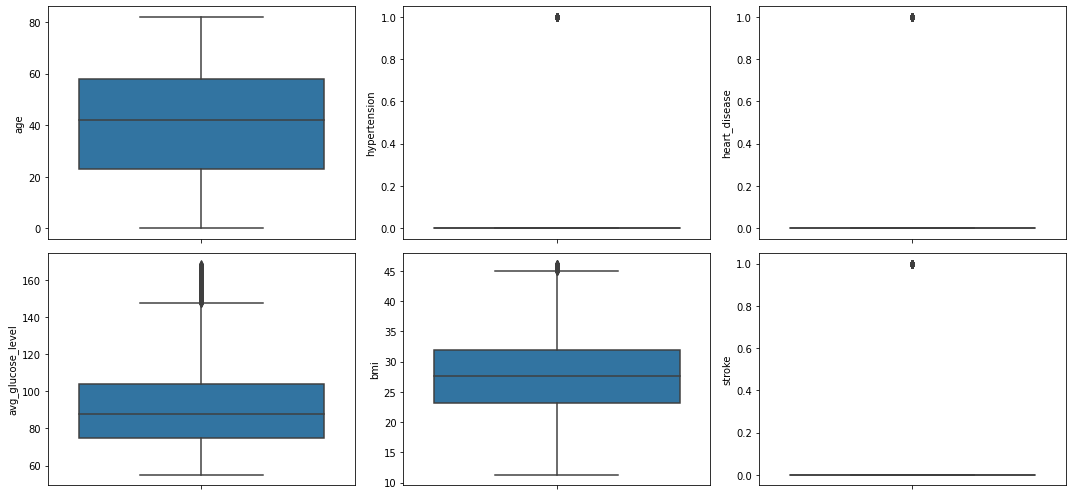

In [42]:
plt.figure(figsize=(15, 7))
for i in range(0, len(nums)):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[nums[i]])
    plt.tight_layout()

**Feature Selection - Correalation Coefficient or Correlation Matrix**

<AxesSubplot:>

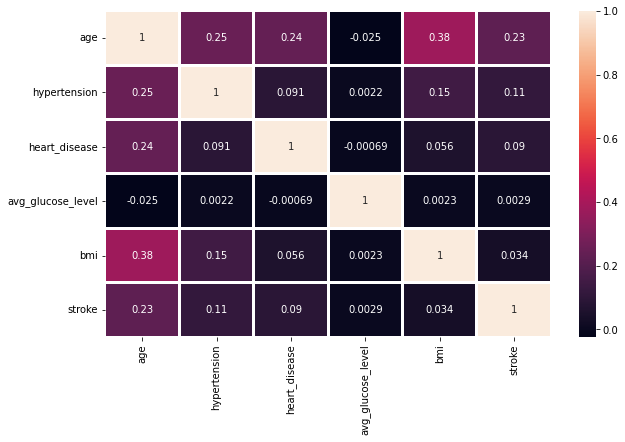

In [43]:
plt.figure(figsize= (10,6))
sns.heatmap(df[nums].corr(), annot=True, linewidths=2)

<AxesSubplot:>

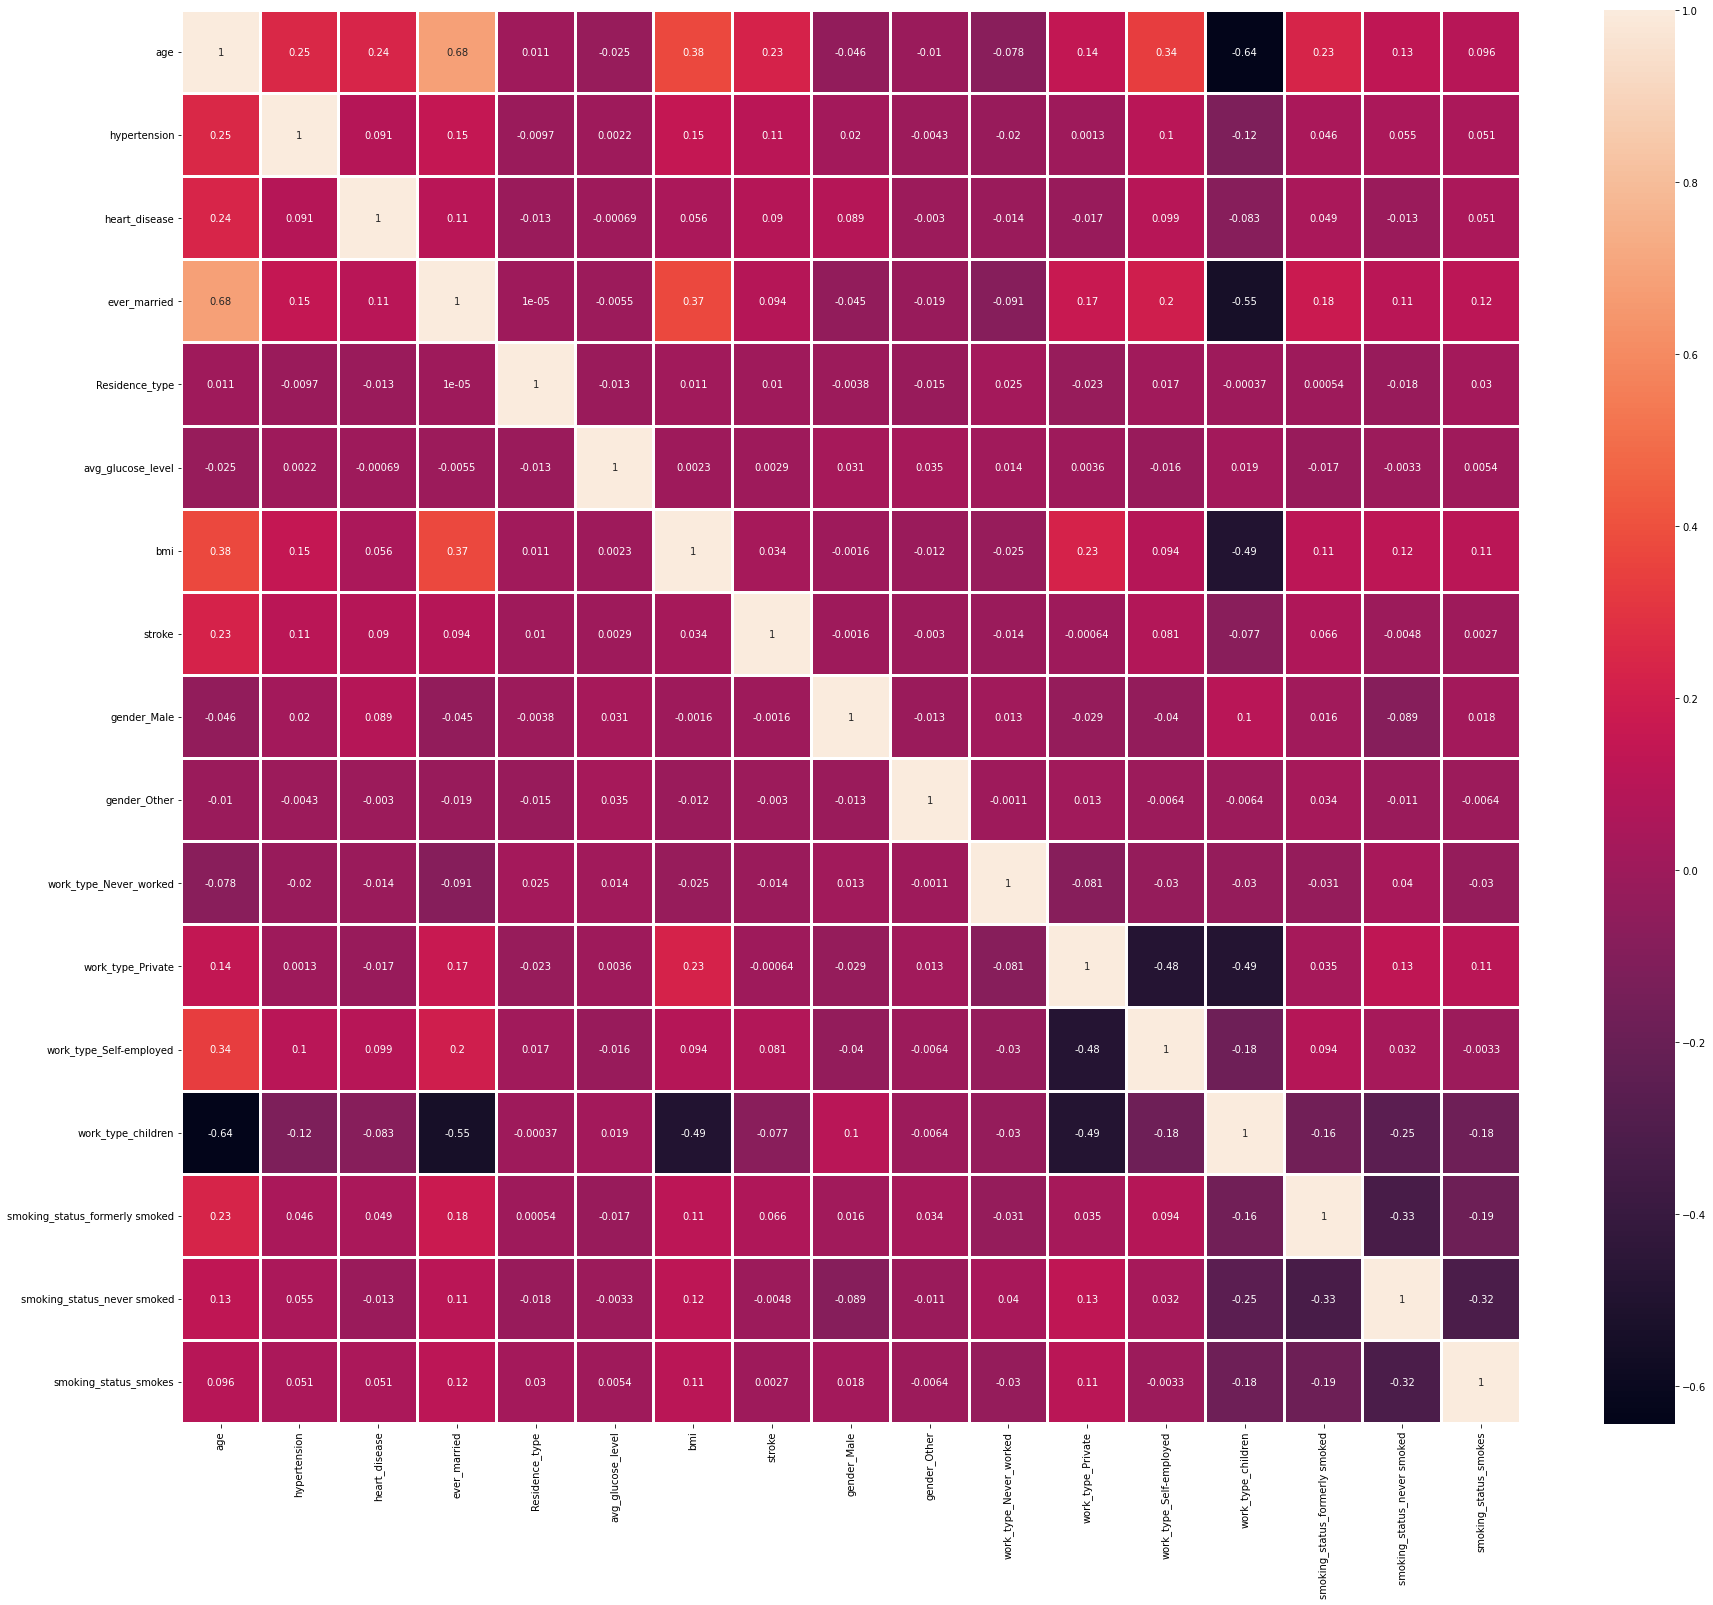

In [44]:
plt.figure(figsize= (30,26))
sns.heatmap(df.corr(), annot=True, linewidths=2)

**Pairplot for better visualisation**

<Figure size 14400x7200 with 0 Axes>

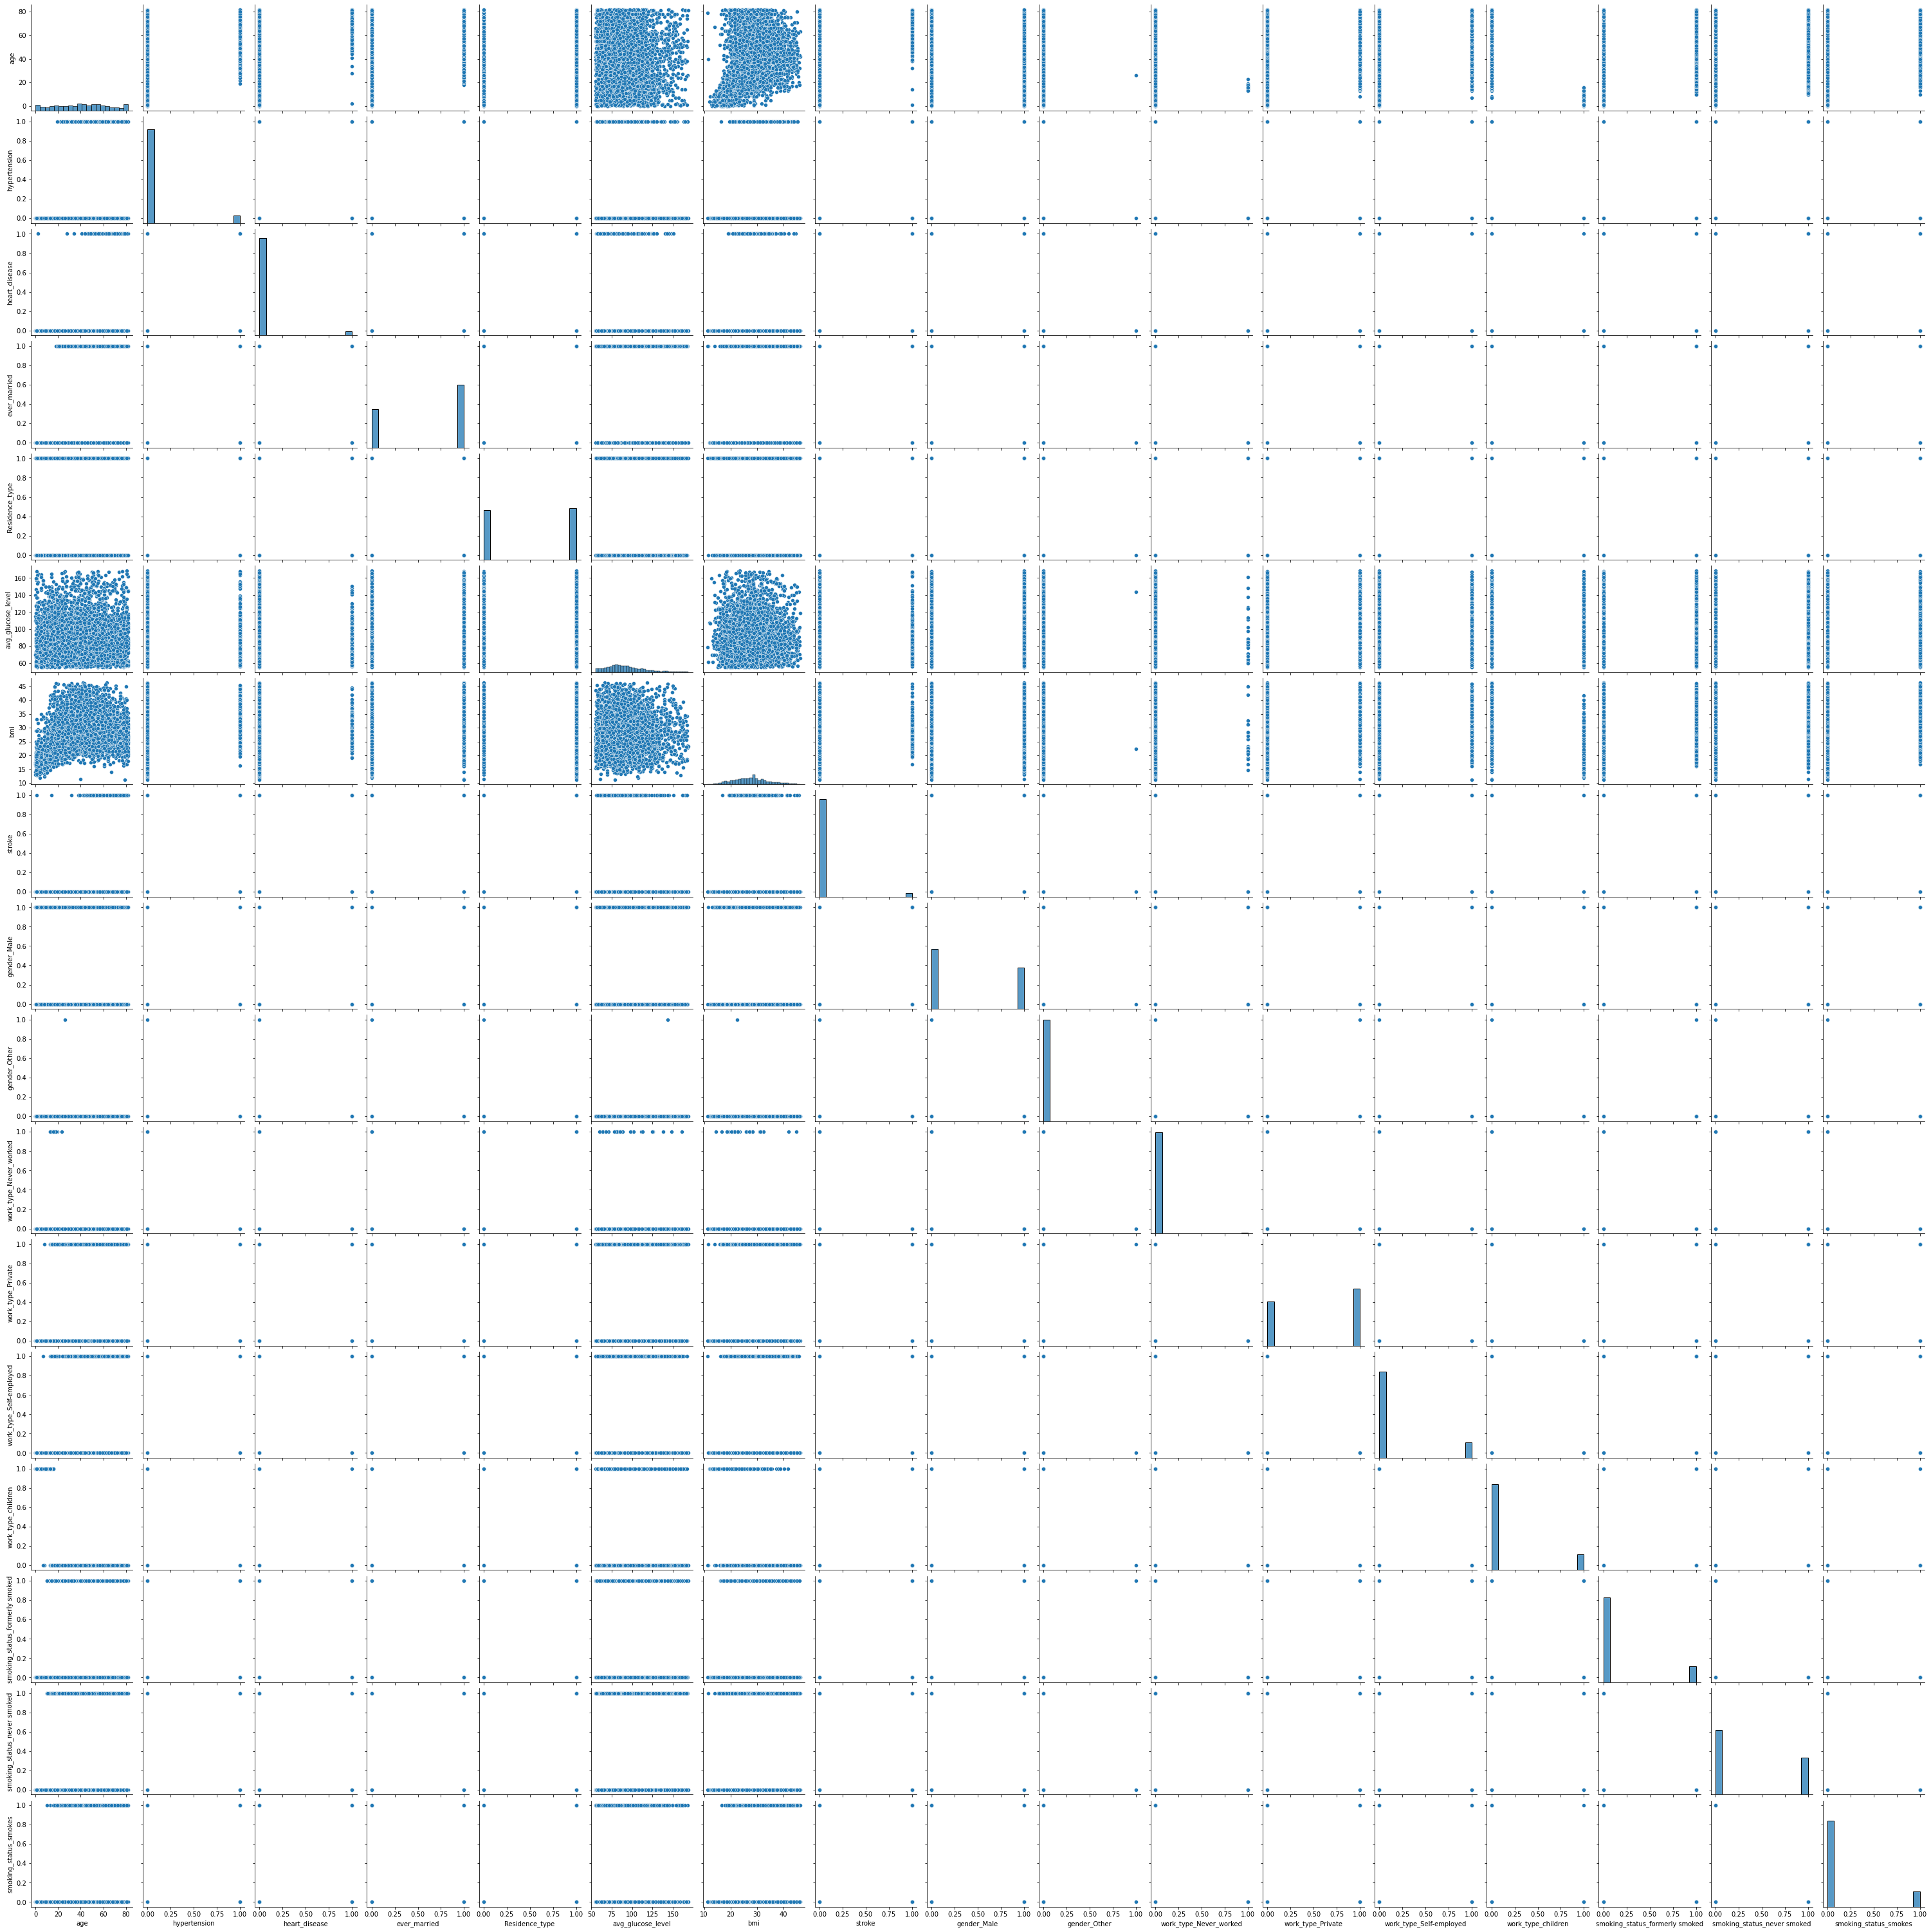

In [45]:
plt.figure(figsize= (200,100))
sns.pairplot(df)

There are no highly correlated columns, so no need to drop any columns

**Separating Feature and Target**

In [46]:
# separate feature and target
X = df.drop(columns = ['stroke'])
y = df['stroke']

In [47]:
X.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2,80.0,0,1,1,0,105.92,32.500000,1,0,0,1,0,0,0,1,0
6,74.0,1,1,1,0,70.09,27.400000,1,0,0,1,0,0,0,1,0
7,69.0,0,0,0,1,94.39,22.800000,0,0,0,1,0,0,0,1,0
8,59.0,0,0,1,0,76.15,28.893237,0,0,0,1,0,0,0,0,0
9,78.0,0,0,1,1,58.57,24.200000,0,0,0,1,0,0,0,0,0


In [48]:
y.head()

2    1
6    1
7    1
8    1
9    1
Name: stroke, dtype: int64

In [49]:
print(f'''{X.shape}''')

(4391, 16)


In [50]:
print(f'''{y.value_counts(normalize=True)}''')

0    0.962423
1    0.037577
Name: stroke, dtype: float64


**Oversampling by SMOTE to Balance the Imbalanced Data**

In [51]:
# using SMOTE Techniqe
sm = SMOTE(random_state=111)
X_sm , y_sm = sm.fit_resample(X,y)

In [52]:
print(f'''{X_sm.shape}''')

(8452, 16)


In [53]:
print(f'''{y_sm.value_counts(normalize=True)}''')

1    0.5
0    0.5
Name: stroke, dtype: float64


**Splitting dataset into train data and test data**

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = .2, random_state = 111)
X_train.shape, y_train.shape, X_test.shape, y_test.shape
y_test_rf=y_test
y_test_rf.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1691,), (6761, 16), (6761,), (1691, 16), (1691,))

**Feature Scaling to Normalize data with MinMaxScaler()**

In [55]:
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

# Creating Machine Learning Models Including a Baseline Model

**Using Random Forest Classifier as Baseline Model**

In [56]:
# Create simple model
baseline_model = RandomForestClassifier()
baseline_model.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
# Test model with test data
y_pred = baseline_model.predict(X_test)
y_pred_rf=y_pred

In [58]:
# Simple model report
acc = accuracy_score(y_test, y_pred)
print('Testing-set Accuracy score is:', acc)
print('Training-set Accuracy score is:',accuracy_score(y_train,baseline_model.predict(X_train)))

baseline_report = classification_report(y_test, y_pred, output_dict=True, target_names=['No Stroke', 'Stroke'])
pd.DataFrame(baseline_report).transpose()

Testing-set Accuracy score is: 0.9633353045535187
Training-set Accuracy score is: 1.0


,precision,recall,f1-score,support
No Stroke,0.964198,0.959459,0.961823,814.000000
Stroke,0.962543,0.966933,0.964733,877.000000
accuracy,0.963335,0.963335,0.963335,0.963335
macro avg,0.963370,0.963196,0.963278,1691.000000
weighted avg,0.963339,0.963335,0.963332,1691.000000


<AxesSubplot:>

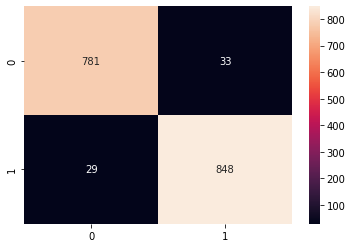

In [59]:
# Confussion matrix
baseline_cf = confusion_matrix(y_test, y_pred)
sns.heatmap(baseline_cf, annot = True, fmt = "d")

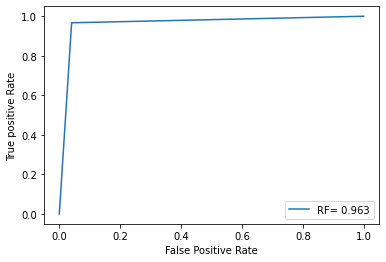

In [60]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
aucr=auc(fpr,tpr)
plt.plot(fpr,tpr, label='RF= %0.3f' %aucr)
plt.legend(loc = 'lower right')
plt.ylabel('True positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Building some other models-LR, KNN, Decision Tree, SGD,GaussianNaiveBayes, SVC, GBM, AdaBoost, XGBoost, LightGBM** 

In [61]:
models = [("LR", LogisticRegression()),
          ("KNN", KNeighborsClassifier()),
          ("DecisionTree", DecisionTreeClassifier()),
          ("SGD",SGDClassifier()),
          ("GaussianNaiveBayes",GaussianNB()),
          ("SVC", SVC()),
          ("GBM", GradientBoostingClassifier()),
          ("AdaBoost", AdaBoostClassifier()),
          ("XGBoost", XGBClassifier()),
          ("LightGBM", LGBMClassifier())]

In [62]:
# Simple model report
models_report = classification_report(y_test, y_pred, output_dict=True, target_names=['No Stroke', 'Stroke'])
for name, regressor in models:
        regressor.fit(X_train, y_train)
        acc = accuracy_score(y_test, regressor.predict(X_test))
        y_pred = regressor.predict(X_test)
        print(f'{name}')
        print('Testing-set Accuracy score is:',acc)
        print('Training-set Accuracy score is:',accuracy_score(y_train,regressor.predict(X_train)))
        models_report = classification_report(y_test, regressor.predict(X_test), output_dict=True, target_names=['No Stroke', 'Stroke'])
        print(pd.DataFrame(models_report).transpose())
        print('\n')

LR
Testing-set Accuracy score is: 0.8628030751034891
Training-set Accuracy score is: 0.8710249963023221
              precision    recall  f1-score      support
No Stroke      0.850602  0.867322  0.858881   814.000000
Stroke         0.874564  0.858609  0.866513   877.000000
accuracy       0.862803  0.862803  0.862803     0.862803
macro avg      0.862583  0.862965  0.862697  1691.000000
weighted avg   0.863030  0.862803  0.862839  1691.000000


KNN
Testing-set Accuracy score is: 0.9325842696629213
Training-set Accuracy score is: 0.940689247152788
              precision    recall  f1-score      support
No Stroke      0.971698  0.885749  0.926735   814.000000
Stroke         0.902002  0.976055  0.937568   877.000000
accuracy       0.932584  0.932584  0.932584     0.932584
macro avg      0.936850  0.930902  0.932152  1691.000000
weighted avg   0.935552  0.932584  0.932354  1691.000000


DecisionTree
Testing-set Accuracy score is: 0.908929627439385
Training-set Accuracy score is: 1.0
      

LR



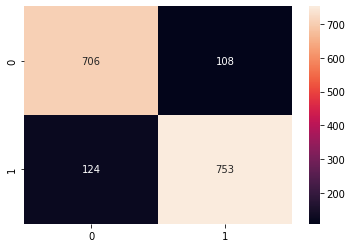



KNN



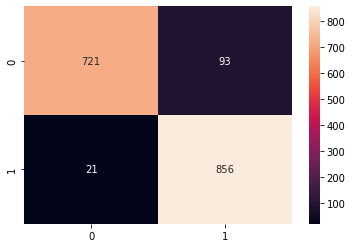



DecisionTree



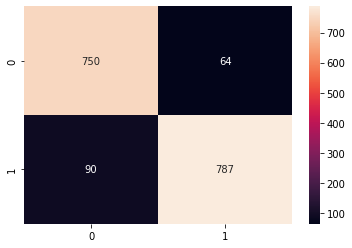



SGD



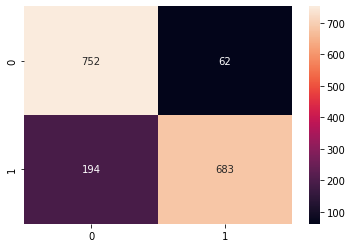



GaussianNaiveBayes



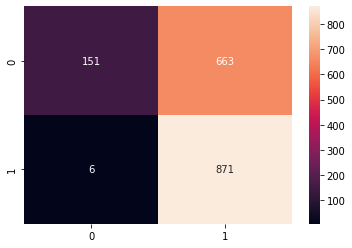



SVC



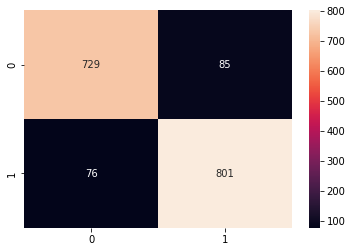



GBM



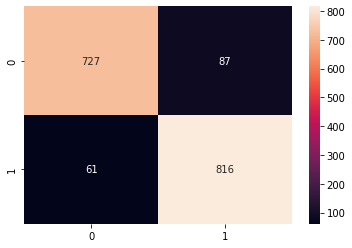



AdaBoost



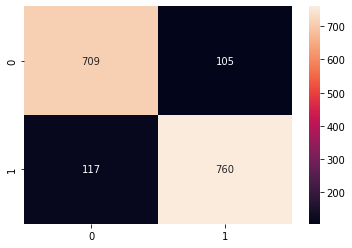



XGBoost



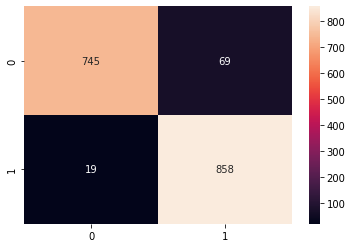



LightGBM



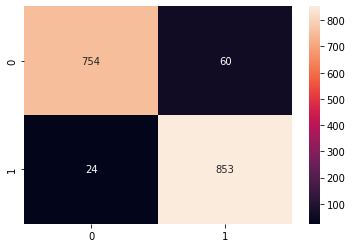

In [63]:
# Confussion matrix
for name, regressor in models:
        models_cf=confusion_matrix(y_test, regressor.predict(X_test))
        print(f'{name}\n')
        sns.heatmap(models_cf, annot=True, fmt='d')
        plt.show()
        print('\n')

LR



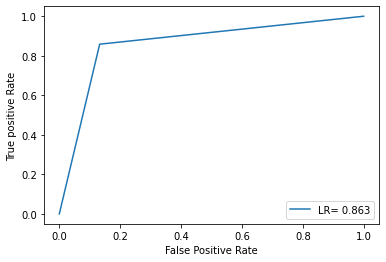



KNN



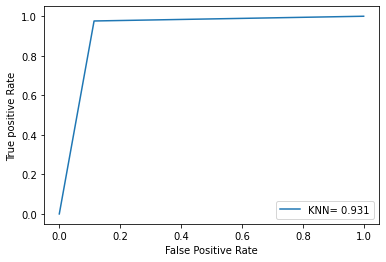



DecisionTree



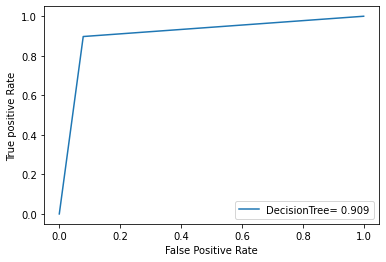



SGD



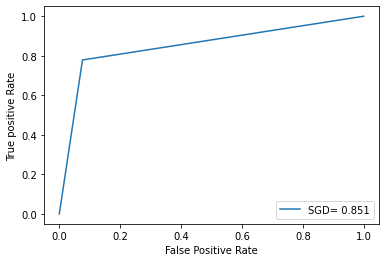



GaussianNaiveBayes



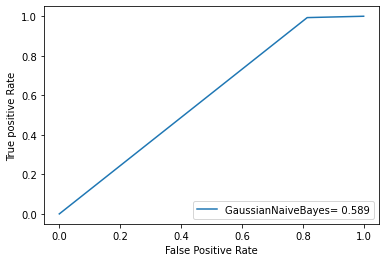



SVC



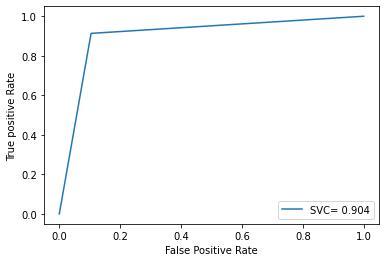



GBM



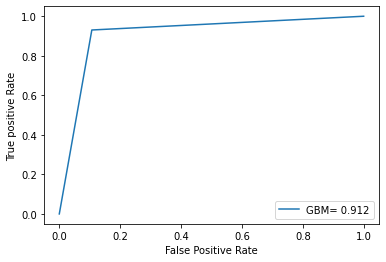



AdaBoost



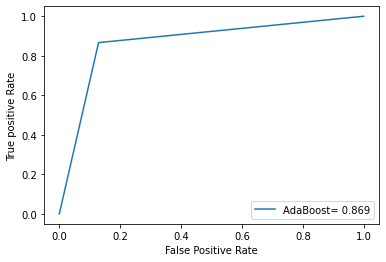



XGBoost



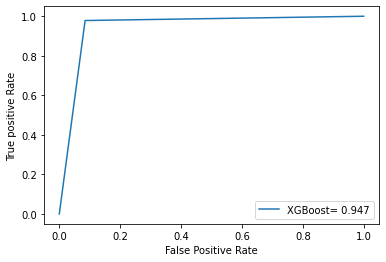



LightGBM



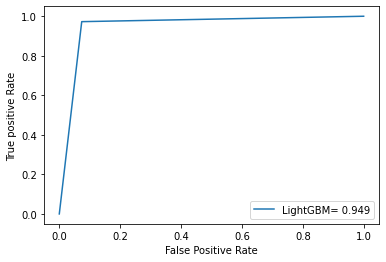

In [64]:
for name, regressor in models:
    fpr, tpr, _ = roc_curve(y_test, regressor.predict(X_test))
    aucm=auc(fpr,tpr)
    print(f'{name}\n')
    plt.plot(fpr,tpr, label=f'{name}= %0.3f' %aucm)
    plt.legend(loc = 'lower right')
    plt.ylabel('True positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    print('\n')

# Model Evaluation- Comparison between Baseline Model and Other Models

In [65]:
for name, regressor in models:
    models_report = classification_report(y_test, regressor.predict(X_test), output_dict=True, target_names=['No Stroke', 'Stroke'])
    metrics = pd.DataFrame({'accuracy' : [baseline_report['accuracy'], models_report['accuracy']],
                        'f1-score_0' : [baseline_report['No Stroke']['f1-score'],models_report['No Stroke']['f1-score']],
                        'precision_0' : [baseline_report['No Stroke']['precision'],models_report['No Stroke']['precision']],
                        'recall_0' : [baseline_report['No Stroke']['recall'],models_report['No Stroke']['recall']],
                        'f1-score_1' : [baseline_report['Stroke']['f1-score'],models_report['Stroke']['f1-score']],
                        'precision_1' : [baseline_report['Stroke']['precision'],models_report['Stroke']['precision']],
                        'recall_1' : [baseline_report['Stroke']['recall'],models_report['Stroke']['recall']]},
                        index=['Model Baseline',f'{name}'])
    
    multiheader = [('','accuracy'),
               ('No Stroke', 'f1-score'),
               ('No Stroke', 'precision'),
               ('No Stroke', 'recall'),
               ('Stroke', 'f1-score'),
               ('Stroke', 'precision'),
               ('Stroke', 'recall')]
    metrics.columns = pd.MultiIndex.from_tuples(multiheader)
    metrics
    print(metrics)
    print('\n') 

                         No Stroke                        Stroke                    
                accuracy  f1-score precision    recall  f1-score precision    recall
Model Baseline  0.963335  0.961823  0.964198  0.959459  0.964733  0.962543  0.966933
LR              0.862803  0.858881  0.850602  0.867322  0.866513  0.874564  0.858609


                         No Stroke                        Stroke                    
                accuracy  f1-score precision    recall  f1-score precision    recall
Model Baseline  0.963335  0.961823  0.964198  0.959459  0.964733  0.962543  0.966933
KNN             0.932584  0.926735  0.971698  0.885749  0.937568  0.902002  0.976055


                         No Stroke                        Stroke                    
                accuracy  f1-score precision    recall  f1-score precision    recall
Model Baseline  0.963335  0.961823  0.964198  0.959459  0.964733  0.962543  0.966933
DecisionTree    0.908930  0.906892  0.892857  0.921376  0.910

LR



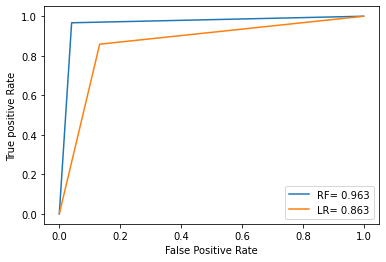

KNN



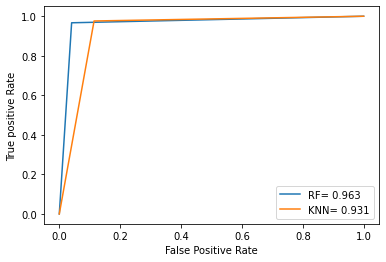

DecisionTree



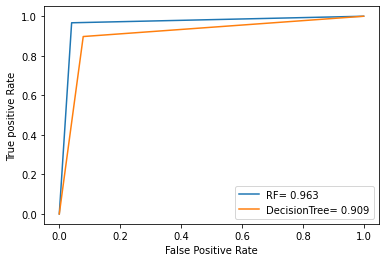

SGD



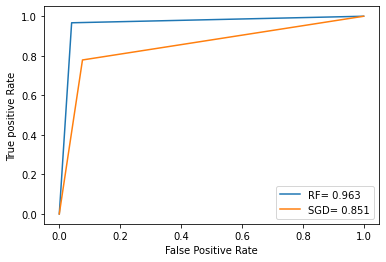

GaussianNaiveBayes



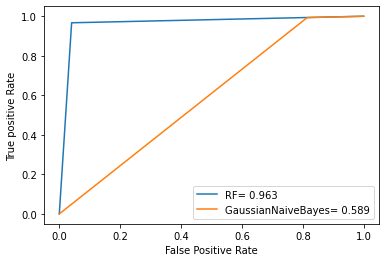

SVC



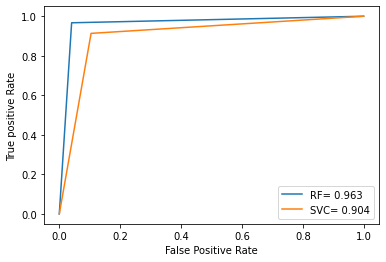

GBM



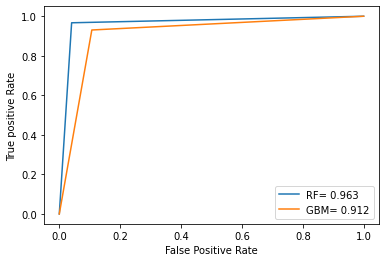

AdaBoost



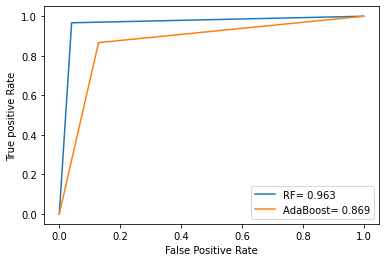

XGBoost



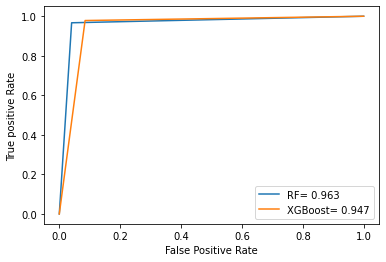

LightGBM



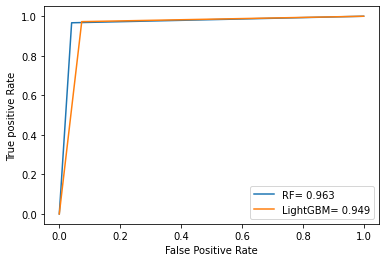

In [66]:
fpr, tpr, _ = roc_curve(y_test_rf, y_pred_rf) 
aucr=auc(fpr,tpr) 
for name, regressor in models: 
    mfpr, mtpr, _ = roc_curve(y_test, regressor.predict(X_test)) 
    print(f'{name}\n') 
    aucm=auc(mfpr,mtpr) 
    plt.plot(fpr,tpr, label='RF= %0.3f' %aucr) 
    plt.legend(loc = 'lower right') 
    plt.plot(mfpr,mtpr,label=f'{name}= %0.3f' %aucm) 
    plt.legend(loc = 'lower right') 
    plt.ylabel('True positive Rate') 
    plt.xlabel('False Positive Rate') 
    plt.show()